# Mushroom foraging with HyperTools

This dataset contains descriptive features of various mushroom species, as well as labels indicating whether tor not they are poisonous. It was downloaded from https://www.kaggle.com/uciml/mushroom-classification

The code below showcases how to visualize this daset with [HyperTools](hypertools.readthedocs.io)

## Going through this notebook

Jupyter notebooks (like this one) are organized into "cells."  Each cell is one of four types (more details are available [here](https://ipython.org/ipython-doc/3/notebook/nbformat.html):
- **Markdown.**  These cells contain formatted text.  [Here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) is a good list showing how to format text using the Markdown language.  To see how the Markdown code in this (or any other) cell, double click it.  (This cell is a Markdown cell.)
- **Heading.** The cells contain only headings (also formatted in Markdown).
- **Code.** These cells contain executable code, usually in Python.  Any variables that are created in a cell, or any functions that are defined, or any data you download or load, will be available for use after you run the cell (unless you kill or restart the Kernel, e.g. by shutting down the notebook and restarting it).
- **Raw NBConvert.** These cells contain un-formatted plain text.

To run each cell, start at the top (click on this cell with the mouse to highlight it).  Then, press [*shift + enter*] to run the cell and continue onto the next.  The open circle in the top right will fill in if the computer is busy running the code.  You should wait for the circle to turn back into an open circle before continuing on with the next cell.

If you want to add to the notebook, or run your own code, you can click the "+" icon at any point to add a new cell.  That will allow you to interact with the data, make your own plots, etc.

## Other notes

This code has been tested with the Docker image for Storytelling with Data.  If you're not running this notebook from within that Docker container, there are no guarantees for whether it'll run, or what it'll do.  To get the Docker container set up, follow the instructions [here](https://github.com/ContextLab/storytelling-with-data/blob/master/docker/README.md).

### Import the libraries we need

Note: the `%matplotlib inline` line is to allow figures to appear inside the notebook.

In [1]:
import pandas as pd
import hypertools as hyp
%matplotlib inline

### Read in the data with pandas

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### pop off column indicating poisonous/non-poisonous

In [3]:
class_labels = data.pop('class')

### Now let's plot the high-dimensional data in a low dimensional space by converting it to a numpy array and passing it to hyperplot.

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


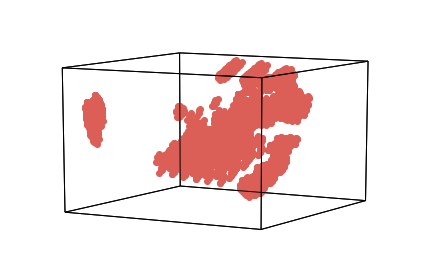

In [4]:
hyp.plot(data, 'o') # if the number of features is greater than 3, the default is to plot in 3d

### From the plots above, it's clear that there are multiple clusters in this data. In addition to descriptive features, this dataset also contains whether or not the mushroom is poisonous.  Do these clusters have bearing on whether or not the mushroom is poisonous?  Let's try to understand this by coloring the points based on whether the mushroom is poisonous:

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/plot.py:230: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


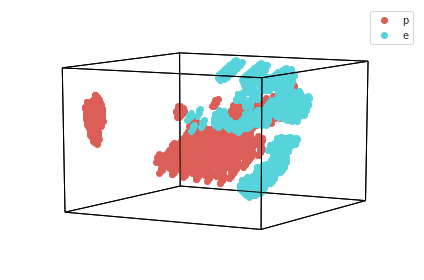

In [5]:
hyp.plot(data,'o', group=class_labels, legend=list(set(class_labels)))

###  From the plot above it is clear that the clustering of the mushrooms carries information about whether or not they are poisonous (red refers to non-poisonous and blue is poisonous). It also looks like there are a number of distinct clusters that are poisonous/non-poisonous.

### Let's use the 'cluster' feature of hypertools to discover these clusters using a k-means fitting procedure:

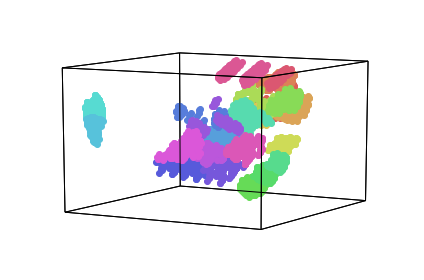

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/cluster.py:73: UserWarning: The ndims argument is now deprecated. Ignoring dimensionality reduction step.
  warnings.warn('The ndims argument is now deprecated. Ignoring dimensionality reduction step.')
/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


In [6]:
hyp.plot(data, 'o', n_clusters=23)

# you can also recover the cluster labels using the cluster tool
cluster_labels = hyp.tools.cluster(data, n_clusters=23, ndims=3) 

# hyp.plot(data, 'o', point_colors=cluster_labels, ndims=2)

### Sidenote: we can change the color palette using the palette argument.  Hypertools supports [matplotlib](https://matplotlib.org/users/colormaps.html) and [seaborn](http://seaborn.pydata.org/tutorial/color_palettes.html) color palettes.

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/plot.py:230: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '
/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


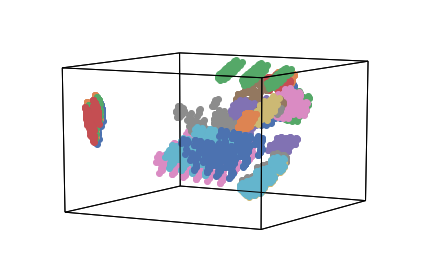

In [7]:
hyp.plot(data,'o', group=cluster_labels, palette="deep")

### Hypertools uses PCA to reduce the dimensionality by default, but there are other ways to do dimensionality reduction.  Let's try reducing with various techniques, but keeping the cluster labels the same.

## ICA

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/plot.py:224: UserWarning: Model and model_params arguments will be deprecated. Please use                       reduce keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  reduce keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot')
/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/plot.py:230: UserWarning: Group will be deprecated. Please use hue keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  warnings.warn('Group will be deprecated. Please use '


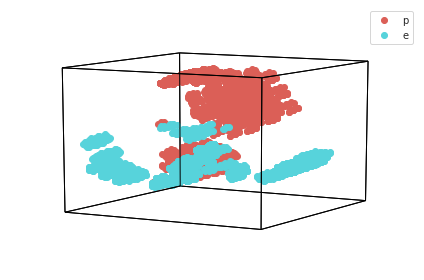

In [8]:
hyp.plot(data,'o', group=class_labels, legend=list(set(class_labels)), model='FastICA')

## t-SNE

/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/plot/plot.py:224: UserWarning: Model and model_params arguments will be deprecated. Please use                       reduce keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot
  reduce keyword argument. See docs for details: http://hypertools.readthedocs.io/en/latest/hypertools.plot.html#hypertools.plot')
/optnfs/el7/jupyterhub/envs/Psych81.09/lib/python3.6/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


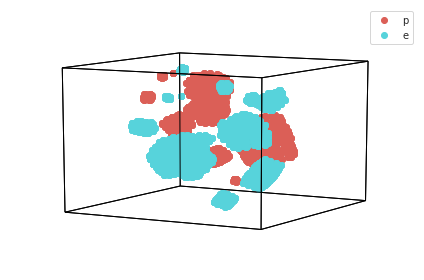

In [10]:
hyp.plot(data,'o', hue=class_labels, legend=list(set(class_labels)), model='TSNE')

# What next?

What do you want to know about this dataset?  Try creating another plot or trying to draw some conclusions about the structure of the data.

## Further reading
- Kaggle post on exploring the structure of high-dimensional data: [link](http://blog.kaggle.com/2017/04/10/exploring-the-structure-of-high-dimensional-data-with-hypertools-in-kaggle-kernels/)
- Tutorial on Pandas (a super powerful Python package for manipulating and organizing data): [link](https://pandas.pydata.org/pandas-docs/stable/10min.html)